In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline 


def classify_sentiment_bert(comment, analyzer):
    # Get the sentiment score
    sentiment_score = analyzer(str(comment))
    
    # Clasify the sentiment based on the score
    if sentiment_score[0]["label"] == "POS":
        return 'Positive'
    elif sentiment_score[0]["label"] == "NEG":
        return 'Negative'
    else:
        return 'Neutral'

def classify_comments_bert(csv_path):
    df = pd.read_csv(csv_path)

    analyzer = pipeline("sentiment-analysis", model="pysentimiento/robertuito-sentiment-analysis", truncation = True) 
    # BERT only processes up to 128 tokens, so truncation is enabled
    
    sentiments = []

    for i, row in df.iterrows():
        sentiment = classify_sentiment_bert(row['cleaned_comment'], analyzer)
        sentiments.append(sentiment)

        if i % 1000 == 0 and i > 0: # type: ignore
            print(f"Clasificados {i} comentarios...")

    df['sentiment_Bert'] = sentiments
    df.to_csv('../data/comments_with_sentiment.csv', index=False)
    print("Los comentarios con clasificación de sentimiento Bert han sido guardados.")
    
    return df

# Clasify comments using BERT and save the results
classified_comments_bert = classify_comments_bert('../data/comments_with_sentiment.csv')

config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

c:\Users\laura\OneDrive\Escritorio\Universidad\Investigación\youtube-data-extraction\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\laura\.cache\huggingface\hub\models--pysentimiento--robertuito-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Device set to use cpu


Clasificados 1000 comentarios...
Clasificados 2000 comentarios...
Clasificados 3000 comentarios...
Clasificados 4000 comentarios...
Clasificados 5000 comentarios...
Clasificados 6000 comentarios...
Clasificados 7000 comentarios...
Clasificados 8000 comentarios...
Clasificados 9000 comentarios...
Clasificados 10000 comentarios...
Clasificados 11000 comentarios...
Clasificados 12000 comentarios...
Clasificados 13000 comentarios...
Clasificados 14000 comentarios...
Clasificados 15000 comentarios...
Clasificados 16000 comentarios...
Clasificados 17000 comentarios...
Clasificados 18000 comentarios...
Los comentarios con clasificación de sentimiento Bert han sido guardados.


<Axes: >

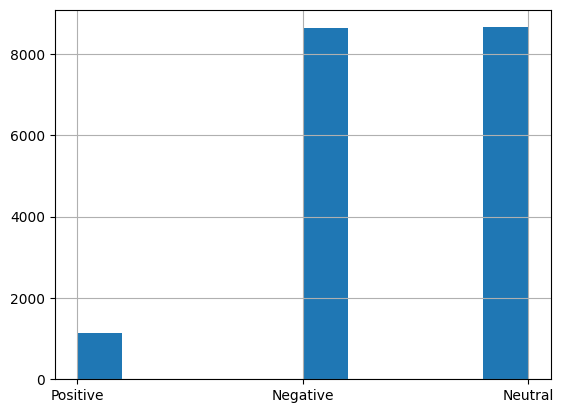

In [2]:
classified_comments_bert['sentiment_Bert'].hist()